In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sn 
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [3]:
! wget https://lazyprogrammer.me/course_files/spam.csv

--2023-03-24 17:21:40--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491,86K   450KB/s    in 1,1s    

2023-03-24 17:21:42 (450 KB/s) - ‘spam.csv’ saved [503663/503663]



In [4]:
df = pd.read_csv('./data/spam.csv', encoding="ISO-8859-1")

In [10]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# rename columns to something better 
df.columns = ['labels', 'data']

In [14]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot: >

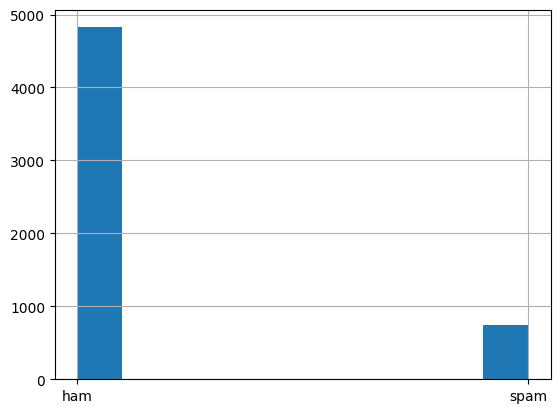

In [15]:
# imbalanced classes, makes sense to use f1 and auc scores
df['labels'].hist()

In [16]:
# create binary labels, new column with values based on the labels column
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})

# extract in new dataframe 
Y = df['b_labels'].to_numpy()

In [17]:
# split up the data 
df_train, df_test, Ytrain, Ytest = train_test_split(
    df['data'], Y, test_size=0.33
)

In [20]:
# try multiple ways of calculating features 
# featurizer = TfidfVectorizer(decode_error = 'ignore')
# Xtrain = featurizer.fit_transform(df_train) 
# Xtest = featurizer.transform(df_test) 

featurizer = CountVectorizer(decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train) 
Xtest = featurizer.transform(df_test) 

In [21]:
Xtrain

<3733x7115 sparse matrix of type '<class 'numpy.int64'>'
	with 49943 stored elements in Compressed Sparse Row format>

In [22]:
# create the model, train it, print scores 
model = MultinomialNB() 
model.fit(Xtrain, Ytrain) 
print("train acc:", model.score(Xtrain, Ytrain))
print("test acc:", model.score(Xtest, Ytest))

train acc: 0.994106616662202
test acc: 0.9815116911364872


In [23]:
# classes are imbalanced (model can be predicting ham all the time, since thats the overbalanced class)
Ptrain  = model.predict(Xtrain) 
Ptest = model.predict(Xtest) 
print("train F1:", f1_score(Ytrain, Ptrain)) 
print("test F1:", f1_score(Ytest, Ptest))

train F1: 0.978131212723658
test F1: 0.9264069264069263


In [24]:
Prob_train = model.predict_proba(Xtrain)[:, 1] 
Prob_test = model.predict_proba(Xtest)[:, 1] 
print("train AUC:", roc_auc_score(Ytrain, Prob_train))
print("test AUC:", roc_auc_score(Ytest, Prob_test))

train AUC: 0.9935622238743997
test AUC: 0.9761397805347972


In [25]:
cm = confusion_matrix(Ytrain, Ptrain) 
cm

array([[3219,    8],
       [  14,  492]])

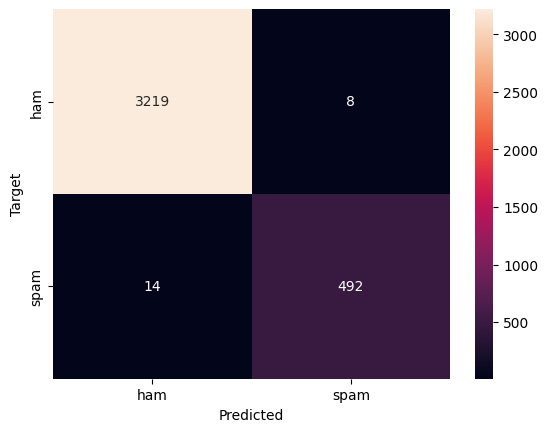

In [26]:
def plot_cm(cm): 
    classes = ['ham', 'spam']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

plot_cm(cm)

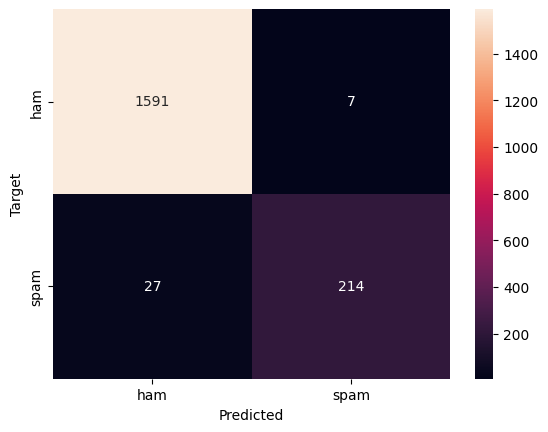

In [27]:
cm_test = confusion_matrix(Ytest, Ptest) 
plot_cm(cm_test) 

In [28]:
# visualize the data 
def visualize(label): 
    words = '' 
    for msg in df[df['labels'] == label]['data']: 
        msg = msg.lower() 
        words += msg + " "
        
    wordcloud = WordCloud(width=600, height=400).generate(words) 
    plt.imshow(wordcloud) 
    plt.axis('off') 
    plt.show()

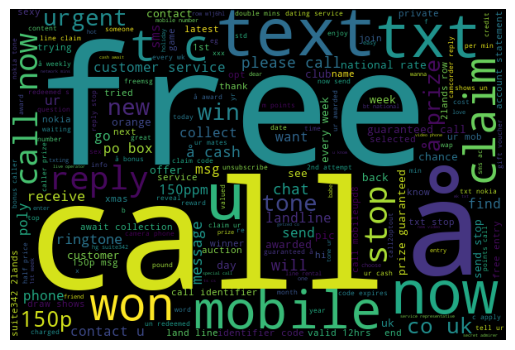

In [29]:
visualize('spam')

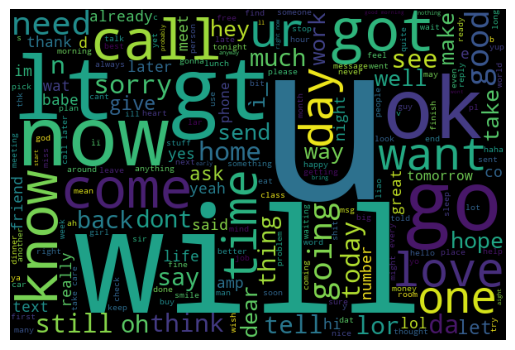

In [30]:
visualize('ham')

In [31]:
# see what we are getting wrong 
X = featurizer.transform(df['data'])
df['predictions'] = model.predict(X)

In [32]:
# things that should be spam 
sneaky_spam  = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam: 
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac sun0819 posts HELLO:\You seem cool
Email AlertFrom: Jeri StewartSize: 2KBSubject: Low-cost prescripiton drvgsTo listen to email call 123
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Ca

In [33]:
# things that should not be spam 
# perhaaps some are misllabeled? 
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam: 
    print(msg)

Finally the match heading towards draw as your prediction.
Yes:)from last week itself i'm taking live call.
Waiting for your call.
Can u get pic msgs to your phone?
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
No pic. Please re-send.
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
Have you laid your airtel line to rest?
I liked the new mobile
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
